## Supplement 3: Regression

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(, w_1) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

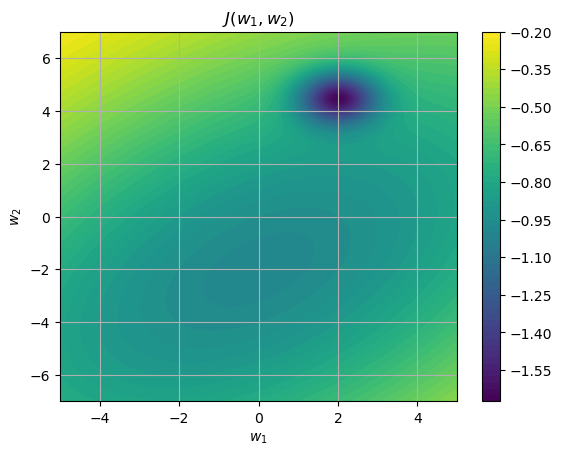

In [6]:
n_w = 1001
max_val = [5,7]
# distance between two samples
d = [2*max_val[0] / (n_w-1), 2*max_val[1] / (n_w-1)]
w_1, w_2 = np.linspace(-max_val[0], max_val[0], n_w), np.linspace(-max_val[1], max_val[1], n_w)
w_1v, w_2v = np.meshgrid(w_1, w_2, sparse=True)
J_w = -np.exp(-1/100 * (w_1v**2 + w_2v**2 - w_1v*w_2v - 2*w_1v + 4*w_2v + 5)) - 2*np.exp(-(w_1v**2 + w_2v**2 - 4*w_1v - 9*w_2v + 25))

plt.contourf(w_1, w_2, J_w, levels=64)
plt.colorbar()
plt.grid()
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('$J(w_1,w_2)$')
plt.show()

ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

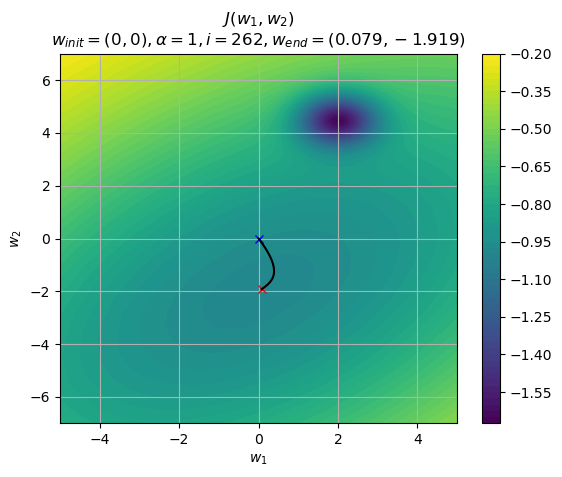

In [3]:
# grad_J_w_1 inverted?
grad_J_w_1 = 1/100*(2*w_1v-w_2v-2) * np.exp(-1/100 * (w_1v**2 + w_2v**2 - w_1v*w_2v - 2*w_1v + 4*w_2v + 5)) + 4*(w_1v-2) * np.exp(-(w_1v**2 + w_2v**2 - 4*w_1v - 9*w_2v + 25))
grad_J_w_2 = 1/100*(2*w_2v-w_1v+4) * np.exp(-1/100 * (w_1v**2 + w_2v**2 - w_1v*w_2v - 2*w_1v + 4*w_2v + 5)) + 2*(2*w_2v-9) * np.exp(-(w_1v**2 + w_2v**2 - 4*w_1v - 9*w_2v + 25))
grad_J_w = np.array([grad_J_w_1, grad_J_w_2])

def grad_descent(grad_J_w, init, alpha, max_val, n_w, tol=1e-3, max_i=1000):
    w = np.array(init)
    w_history = [init]
    # distance between two samples
    max_val = np.array(max_val)
    d = 2*max_val / (n_w-1)
    w_ind = [int((init[0] + max_val[0]) / d[0]), int((init[1] + max_val[1]) / d[1])]
    grad_buf = grad_J_w[:, w_ind[1], w_ind[0]]
    i = 0
    while np.linalg.norm(grad_buf) > tol: # finish in case of very flat local area
        w = w - alpha * grad_buf
        w_ind = ((w + max_val) / d).astype('int')
        if (w_ind[0] < 0 or w_ind[0] >= n_w) or (w_ind[1] < 0 or w_ind[1] >= n_w): break
        w_history.append(w)
        grad_buf = grad_J_w[:, w_ind[1], w_ind[0]]
        i += 1
        if i == max_i: break
    w_history = np.array(w_history)
    return w_history[-1], w_history, i

init = [0,0]
alpha = 1
w_gd, w_hist, i = grad_descent(grad_J_w, init, alpha, max_val, n_w)

plt.contourf(w_1, w_2, J_w, levels=64)
plt.colorbar()
plt.grid()
plt.plot(init[0], init[1], 'bx')
plt.plot(w_gd[0], w_gd[1], 'rx')
plt.plot(w_hist[:,0], w_hist[:,1], 'k')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title(f'$J(w_1,w_2)$\n$w_{{init}}=({init[0]},{init[1]}),\\alpha={alpha},i={i},w_{{end}}=({w_gd[0]:.3f},{w_gd[1]:.3f})$')
plt.show()

### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

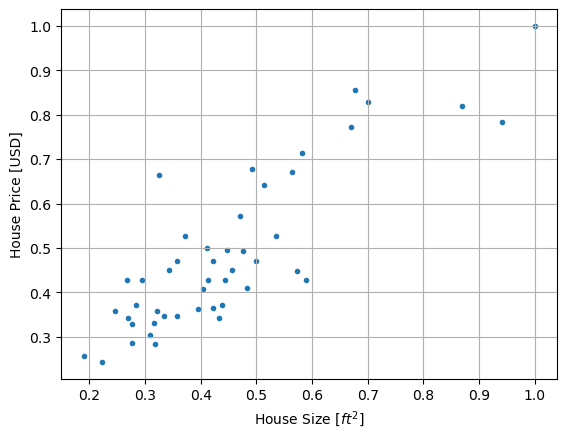

In [6]:
house_metrics = np.loadtxt('house_prices.txt', dtype=int, delimiter=',')
house_sizes = house_metrics[:,0]
house_prices = house_metrics[:,2]
house_sizes = house_sizes.astype('float64') / np.max(house_sizes)
house_prices = house_prices.astype('float64') / np.max(house_prices)

plt.scatter(house_sizes, house_prices, marker='.')
plt.xlabel('House Size [$ft^2$]')
plt.ylabel('House Price [USD]')
plt.grid()
plt.show()

ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

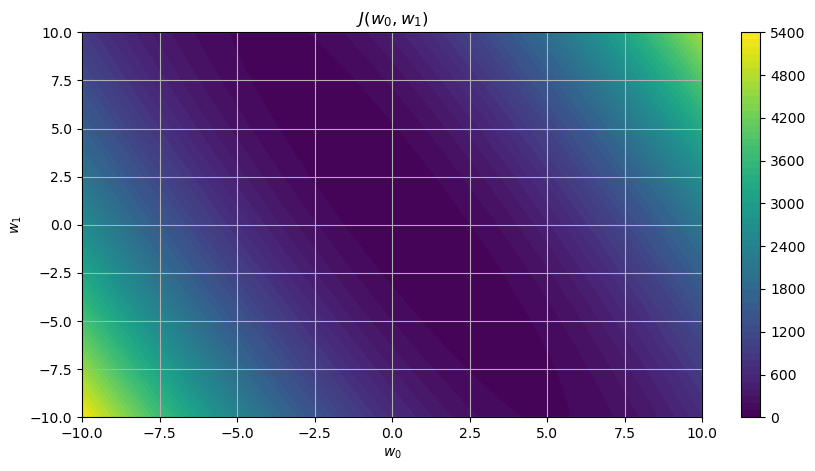

In [24]:
def calculate_J_w(house_sizes, house_prices, max_val, n_w=1001):
    w_0, w_1 = np.linspace(-max_val[0], max_val[0], n_w), np.linspace(-max_val[1], max_val[1], n_w)
    w_0v, w_1v = np.meshgrid(w_0, w_1, sparse=True)
    J_w = np.zeros((n_w,n_w))
    for house_size, house_price in zip(house_sizes, house_prices):
        J_w += 0.5 * np.square(w_0v + w_1v * house_size - house_price)
    return J_w, w_0, w_1

def calculate_grad_J_w(house_sizes, house_prices, max_val, n_w=1001):
    w_0, w_1 = np.linspace(-max_val[0], max_val[0], n_w), np.linspace(-max_val[1], max_val[1], n_w)
    w_0v, w_1v = np.meshgrid(w_0, w_1, sparse=True)
    grad_J_w_0 = np.zeros((n_w,n_w))
    grad_J_w_1 = np.zeros((n_w,n_w))
    for house_size, house_price in zip(house_sizes, house_prices):
        grad_J_w_0 += w_0v + w_1v * house_size - house_price
        grad_J_w_1 += (w_0v + w_1v * house_size - house_price) * house_size
    grad_J_w = np.array([grad_J_w_0, grad_J_w_1])
    return grad_J_w, w_0, w_1

max_val = (10, 10)
J_w , w_0, w_1 = calculate_J_w(house_sizes, house_prices, max_val)
grad_J_w, _, _= calculate_grad_J_w(house_sizes, house_prices, max_val)

plt.figure(figsize=(10,5))
plt.contourf(w_0, w_1, J_w, levels=64)
plt.colorbar()
plt.grid()
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('$J(w_0,w_1)$')
plt.show()
# plt.contourf(w_0,w_1,grad_J_w[1],levels=64)
# plt.colorbar()
# plt.grid()
# plt.show()

* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

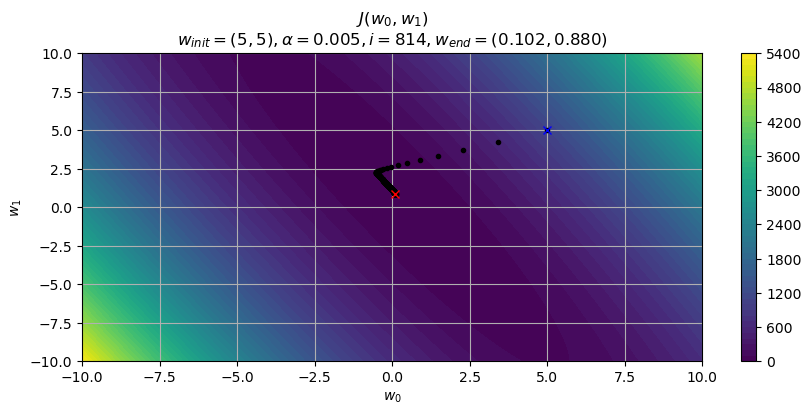

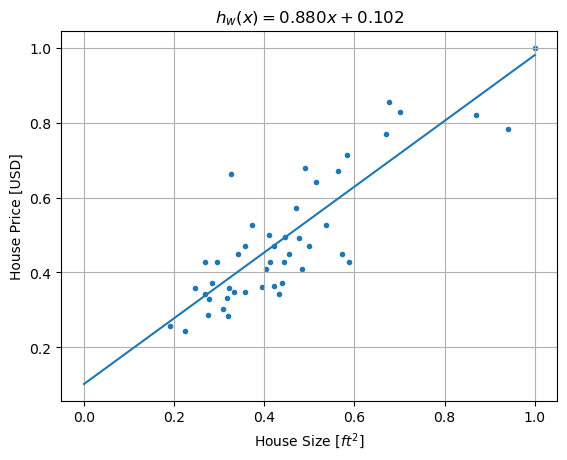

In [63]:
# Train w 
init = [5,5]
alpha = 5e-3
w_gd, w_hist, i = grad_descent(grad_J_w, init, alpha, max_val, n_w, tol=2e-1, max_i=10000)

# Prepare contour plot and mark each weight update on the plot.
plt.figure(figsize=(10,4))
plt.contourf(w_0, w_1, J_w, levels=64)
plt.colorbar()
plt.grid()
plt.plot(w_hist[:,0], w_hist[:,1], 'k.')
plt.plot(init[0], init[1], 'bx')
plt.plot(w_gd[0], w_gd[1], 'rx')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title(f'$J(w_0,w_1)$\n$w_{{init}}=({init[0]},{init[1]}),\\alpha={alpha},i={i},w_{{end}}=({w_gd[0]:.3f},{w_gd[1]:.3f})$')
plt.show()

# OPTIONAL: Plot the resulting linear regression function
x = np.linspace(0, np.max(house_sizes), 1001)
y_gd = w_gd[1] * x + w_gd[0]
plt.scatter(house_sizes, house_prices, marker='.')
plt.xlabel('House Size [$ft^2$]')
plt.ylabel('House Price [USD]')
plt.plot(x, y_gd)
plt.title(f'$h_w(x) = {w_gd[1]:.3f}x + {w_gd[0]:.3f}$')
plt.grid()
plt.show()

* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

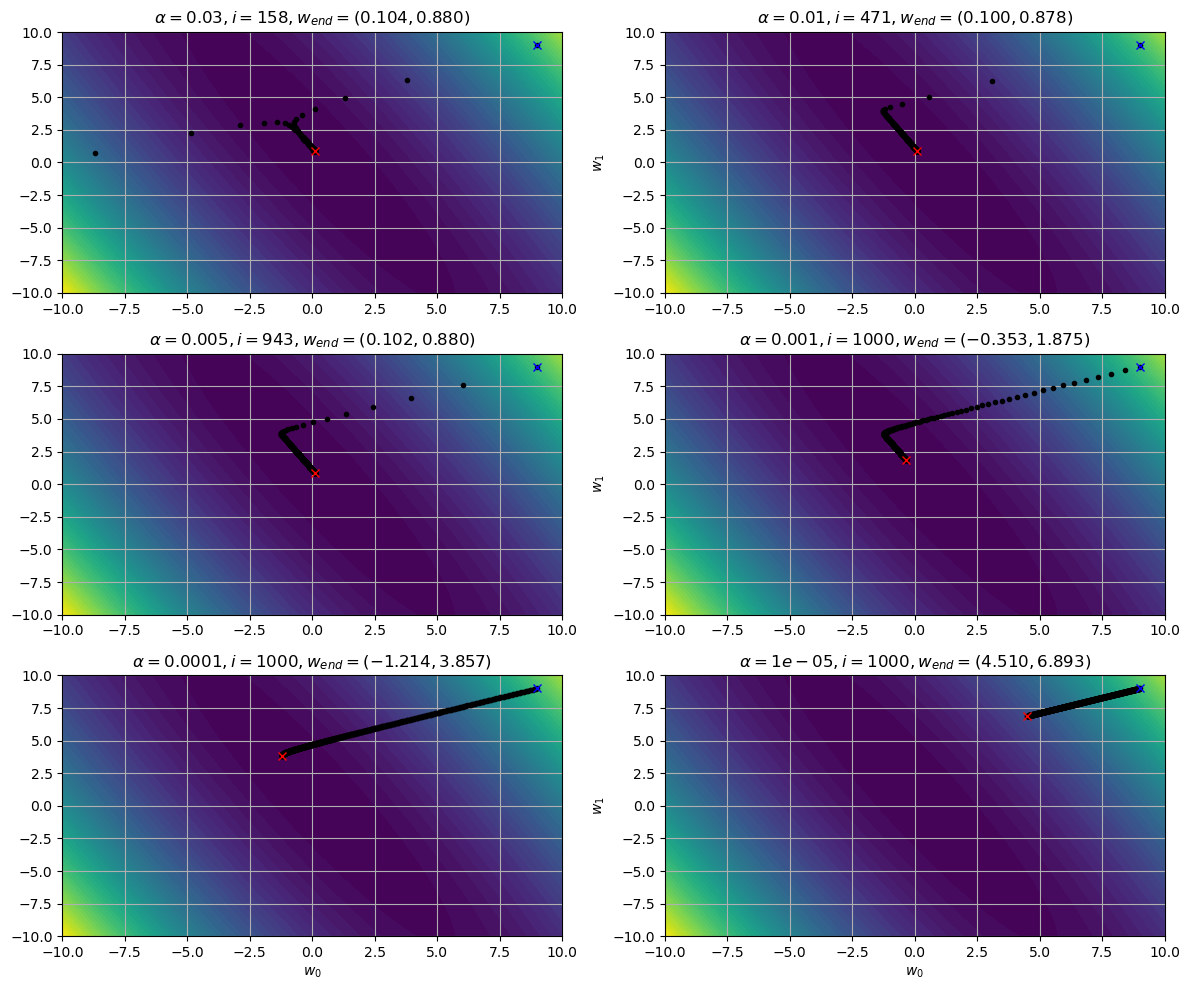

In [64]:
# Define alphas (learning rates) to test.
alphas = [3e-2, 1e-2, 5e-3, 1e-3, 1e-4, 1e-5]
init = [9,9]
max_val = [10, 10]
grad_J_w, w_0, w_1 = calculate_grad_J_w(house_sizes, house_prices, max_val)
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 10))
i_alpha = 0
for row in range(3):
    for col in range(2):
        w_gd, w_hist, i = grad_descent(grad_J_w, init, alphas[i_alpha], max_val, n_w, tol=2e-1, max_i=1000)
        axs[row, col].contourf(w_0, w_1, J_w, levels=64)
        axs[row, col].grid()
        axs[row, col].plot(w_hist[:,0], w_hist[:,1], 'k.')
        axs[row, col].plot(init[0], init[1], 'bx')
        axs[row, col].plot(w_gd[0], w_gd[1], 'rx')
        if row == rows-1:
            axs[row, col].set_xlabel('$w_0$')
        if col == cols-1:
            axs[row, col].set_ylabel('$w_1$')
        axs[row, col].set_title(f'$\\alpha={alphas[i_alpha]},i={i},w_{{end}}=({w_gd[0]:.3f},{w_gd[1]:.3f})$')
        i_alpha += 1
plt.tight_layout()
plt.show()

iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [49]:
X = np.hstack((np.ones((len(house_sizes), 1)), house_sizes.reshape((len(house_prices), 1))))
w_true = np.linalg.inv(X.T @ X) @ X.T @ house_prices
print(w_true)
# not same, but very similar

[0.10182954 0.86070044]


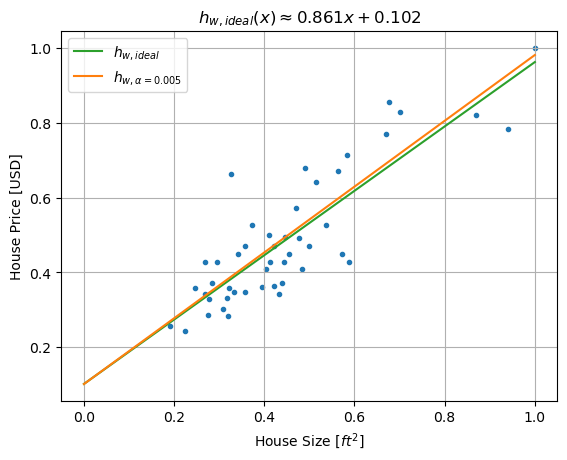

In [65]:
x = np.linspace(0, np.max(house_sizes), 1001)
y_true = w_true[1] * x + w_true[0]
plt.scatter(house_sizes, house_prices, marker='.')
plt.xlabel('House Size [$ft^2$]')
plt.ylabel('House Price [USD]')
plt.plot(x, y_true, color='C2', label='$h_{{w,ideal}}$')
plt.plot(x, y_gd, color='C1', label=f'$h_{{w,\\alpha={alpha}}}$')
plt.legend()
plt.plot()
plt.title(f'$h_{{w,ideal}}(x) \\approx {w_true[1]:.3f}x + {w_true[0]:.3f}$')
plt.grid()
plt.show()